# Deep Learning Fundamentals - LU09B Exercise

## 9B.0 LSTM Example - Sentimental Analysis

ref: https://machinelearningmastery.com/sequence-classification-lstm-recurrent-neural-networks-python-keras/

This lab uses the IMDB dataset from Keras (https://keras.io/api/datasets/imdb/).

The IMDB is a dataset of 25,000 movies reviews from IMDB, labeled by sentiment (positive-1/negative-0). Reviews have been preprocessed, and each review is encoded as a list of word indexes (integers). For convenience, words are indexed by overall frequency in the dataset, so that for instance the integer "3" encodes the 3rd most frequent word in the data. This allows for quick filtering operations such as: "only consider the top 10,000 most common words, but eliminate the top 20 most common words".

As a convention, "0" does not stand for a specific word, but instead is used to encode any unknown word.

In [1]:
from keras.datasets import imdb

max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
my_batch_size = 64

print('Loading data...')

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
    
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

Loading data...
17473536/17464789 [==============================] - 0s 0us/step
x_train shape: (25000,)
x_test shape: (25000,)
y_train shape: (25000,)
y_test shape: (25000,)


## 9B.1 Print out some sample data

In [2]:
import random

i = random.randint(0, x_train.shape[0])
print(x_train[i])
print()
print(y_train[i])

[1, 1324, 347, 118, 731, 212, 126, 14, 20, 2, 51, 32, 87, 102, 2, 18, 4, 3565, 7, 6, 182, 5, 58, 15, 75, 181, 8, 796, 1980, 5, 166, 178, 1264, 8, 30, 173, 7, 4, 406, 1522, 54, 13, 244, 1336, 14, 20, 8440, 61, 1103, 5, 166, 72, 462, 5, 15, 9, 131, 283, 103, 111, 4719, 210, 1476, 10, 10, 32, 7, 4, 156, 26, 11, 350, 812, 4, 7424, 26, 38, 351, 23, 5, 4, 105, 2, 38, 73, 295, 15, 25, 859, 4, 284, 633, 878, 8, 81, 19, 3297, 5663, 5, 2381, 4, 696, 177, 9, 4152, 530, 2, 2, 6, 964, 2, 5033, 2, 2, 2, 4, 289, 2, 2, 17, 3888, 4316, 21, 58, 152, 1778, 2, 142, 75, 70, 7299, 39, 2, 2, 2, 2, 1410, 5, 1001, 3504, 33, 4, 2469, 1709, 5, 2, 2, 89, 111, 1290, 28, 2, 10, 10, 92, 717, 14, 3522, 2528]

1


## 9B.2 Decode (reverse) the data

In [3]:
vocab_dict = imdb.get_word_index()

# Inverse the dict for lookup via idx:
vocab_dict = dict((v, k) for k, v in vocab_dict.items())

i = random.randint(0,x_train.shape[0])
print(x_train[i])
print()

txt = [vocab_dict[idx] if idx in vocab_dict else "XXX" for idx in x_train[i]]
print(txt)

1654784/1641221 [==============================] - 0s 0us/step
[1, 112, 6, 228, 1475, 546, 13, 197, 6, 20, 656, 273, 11, 6, 2, 238, 30, 253, 8, 106, 117, 122, 13, 124, 13, 69, 57, 326, 14, 20, 16, 448, 23, 6, 274, 34, 8228, 9866, 14, 20, 16, 4035, 469, 45, 578, 15, 2500, 1040, 4, 229, 115, 270, 2020, 11, 6, 2, 5, 152, 124, 6, 155, 44, 4744, 228, 387, 72, 202, 25, 43, 6, 171, 2685, 300, 50, 9, 57, 96, 259, 62, 30, 6999, 8, 6, 4744, 2, 19, 57, 4744, 2333, 1689, 43, 260, 6, 327, 1719, 544, 218, 195, 1371, 198, 6, 275, 155, 3902, 160, 512, 275, 3120, 45, 40, 395, 4, 2, 54, 2, 18, 6, 2, 707, 241, 89, 216, 4, 761, 5035, 228, 2604, 16, 11, 4, 1118, 6973, 48, 59, 286, 6, 1118, 2489, 765, 59, 62, 28, 57, 135, 11, 6, 904, 40, 15, 5, 48, 59, 16, 6, 1118, 2489, 138, 1173, 75, 579, 38, 342, 112, 502, 8, 332, 228, 9, 6, 7350, 48, 335, 8, 678, 11, 228, 470, 89, 122, 4937, 79, 6, 1070, 7, 15, 374, 2214, 15, 62, 28, 77, 828, 2, 18, 4, 2, 523, 64, 150, 345, 59, 188, 4, 2214, 39, 31, 7, 4, 2, 42, 4, 229,

## 9B.3 Preprocess the input data

In [4]:
from keras.preprocessing import sequence

# Pad to ensure all are 500 length
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (25000, 500)
x_test shape: (25000, 500)


## 9.4B Print out some processed data

In [5]:
i = random.randint(0, x_train.shape[0])
print(x_train[i])

[ 646 2445 8879  370 1102   18    4  561   50   25  235   40   25   44
    8  106  160 9100   18    4  561   10   10   54    4  114  165  517
 7500   31  517    8  235   17   48   31  120    2    2  183   43   92
   97  281 1627   13   62  784    8 2372    4  253    7  149   12   34
  743   46  813  139   21   95  174    4   22    9   38   78   15   25
   26  165  128  125   24  149   12   10   10   86   25  104   12    9
    6  823   65    2   11    6 2599  200    2 6065    5 3101 6736  355
   14 2599 1568   57 3984 1321 1689  247   23    4 3804    2 2493  216
   23   23 3101    2  109  315    4  333  173    7    4   20   43 2884
    4  311   83 1037 2951   10   10   95   13  197   15  279   12    9
    6   20   44    6  250   39    2   21 5216  978   37 2083    8   30
    6 1211 6636 2243   11  101  420   15    9    4  749 6517   34    4
  636  139   21  103   15    4  888    7    2  109    9 1097  416    8
    4 1676  114   38   11  346   57   14    9   24    6   20   44    2
  109 

## 9B.5 Build the LSTM model

In [6]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM
from keras.layers import Dropout
from keras.layers import Dense

model = Sequential()

# Create the embedding layer to manage the 0s
model.add(Embedding(max_features, 64, input_length=500))

# Create a LSTM layer with 100 units. Activation default to be tanh
model.add(LSTM(100))

# Performing binary classification. Use when it is clear that if the review is positive, it cannot be negative. So, there is only actually 1 outcome.
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 64)           640000    
                                                                 
 lstm (LSTM)                 (None, 100)               66000     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 706,101
Trainable params: 706,101
Non-trainable params: 0
_________________________________________________________________
None


## 9B.6 Train the model

In [7]:
# Change the epoch to 2-3 if you are running on your local computer as it may take long
history = model.fit(x_train, y_train, epochs=5, batch_size=my_batch_size, validation_split=0.3)

Epoch 1/5
274/274 [==============================] - 20s 34ms/step - loss: 0.4580 - accuracy: 0.7815 - val_loss: 0.3420 - val_accuracy: 0.8553
Epoch 2/5
274/274 [==============================] - 9s 32ms/step - loss: 0.3359 - accuracy: 0.8617 - val_loss: 0.3638 - val_accuracy: 0.8461
Epoch 3/5
274/274 [==============================] - 9s 32ms/step - loss: 0.2377 - accuracy: 0.9075 - val_loss: 0.3182 - val_accuracy: 0.8693
Epoch 4/5
274/274 [==============================] - 9s 33ms/step - loss: 0.1768 - accuracy: 0.9349 - val_loss: 0.3420 - val_accuracy: 0.8671
Epoch 5/5
274/274 [==============================] - 9s 33ms/step - loss: 0.1218 - accuracy: 0.9574 - val_loss: 0.3751 - val_accuracy: 0.8516


## 9B.7 Plot the training and loss curve

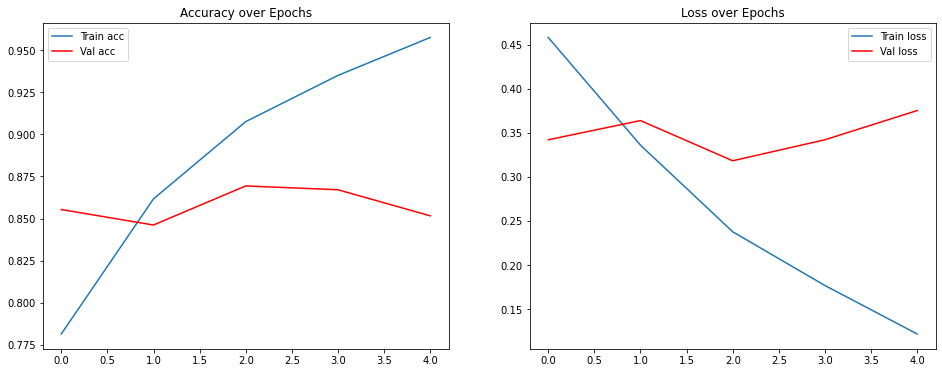

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Train acc')
plt.plot(epochs, val_acc, color='red', label='Val acc')
plt.title('Accuracy over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Train loss')
plt.plot(epochs, val_loss, color='red', label='Val loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

## 9B.8 Evaluation of the model

In [9]:
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy: {:.2f}'.format(scores[1]*100))

Accuracy: 84.77
